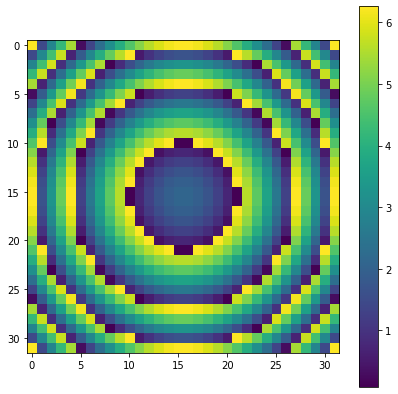

In [1]:
import numpy as np, matplotlib.pyplot as plt
# ---> physics params <---
c = 343 # m/s
v = 40000 # Hz
lam = c/v # m
k = 2*np.pi/lam # rads/m
elem_num = 32 # number of elems along one side of the AMM surface

evpsl = (elem_num/4)*lam # evaluation plane side length

dx = lam/2 # [m]

apsize = (int(2*evpsl/dx), int(2*evpsl/dx)) # AMM aperture size (number of unit cells)

f_AMM = 0.1 # focal length of the AMM [m]

xy_vec = np.arange(-((apsize[0]/2)-0.5)*dx, ((apsize[0]/2)+0.5)*dx, dx)

xx, yy = np.meshgrid(xy_vec, xy_vec)

travel_distance_array = np.sqrt((xx)**2 + (yy)**2 + (f_AMM**2)) # matrix of distances from centre of each elem to focus

total_phase_array = -travel_distance_array * k # total change in phase of waves as they travel this distance.

norm_phase_array = np.remainder(total_phase_array, 2*np.pi) # normalise between 0 and 2π [rads].

AMM_phase_distribution = norm_phase_array # phase on the surface rewuired to perform focusing, assuming incident plane wave.
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(7,7))
im = ax.imshow(AMM_phase_distribution)

plt.colorbar(im)
plt.show()